# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

ANN DNN CNN 정리 블로그
http://physics2.mju.ac.kr/juhapruwp/?p=1517

In [134]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation))
    model.add(Dense(1, activation='sigmoid'))    
    return model

## Load Dataset
- MNIST dataset

In [135]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [136]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


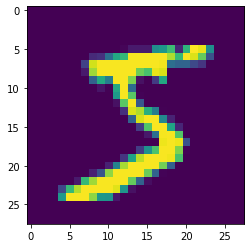

Label:  5


In [137]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

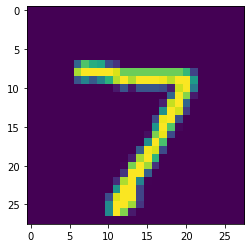

Label:  7


In [138]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [139]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1)) # -1:차원을 줄일때 사용. 뒤에 숫자를 명확히 쓰기 귀찮을때 사용.
X_test = X_test.reshape((X_test.shape[0], -1))

In [140]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [141]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 0 -> 1 0 0
# 1 -> 0 1 0
# 2 -> 0 0 1

In [142]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)# Basic MLP model

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [143]:
model = Sequential()

In [144]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax')) # 카테고리형(10개)일 경우 softmax, 바이너리(1개)일 경우 sigmoid

In [145]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감. sgd = 확률적 경사 하강법
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [146]:
# validation_split : 제대로 학습하고 있는지 확인하고자 또다시 나눈 테스트 셋, overfitting 여부 확인.
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

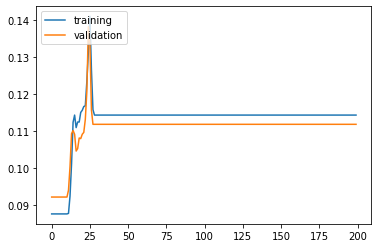

In [147]:
# accuracy loss 차이 : loss=rms값, accuracy=최종 결과. 원본과 T F 확인 비율.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
# 결과 그래프가 25 이후로 일정하게 유지됨. sigmoid의 단점. 미분값이 0이 됨.

Training and validation accuracy seems to improve after around 60 epochs

In [148]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/step


In [149]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization



- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [150]:
# from now on, create a function to generate (return) models
# 초기값 셋팅.
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [151]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

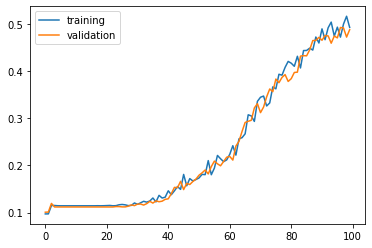

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [153]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 30us/step
[2.08613443069458, 0.4941999912261963]


In [154]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4941999912261963


## 2. Nonlinearity (Activation function)

In [155]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [156]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

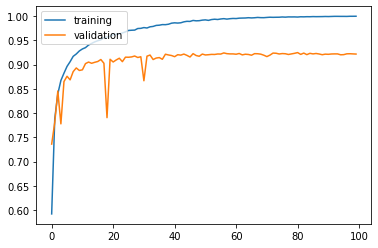

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [159]:
results = model.evaluate(X_test, y_test)
# Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

10000/10000 [==============================] - 0s 30us/step


In [160]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9212999939918518


## 3. Optimizers


In [161]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
#     학습속도 빠르게
    return model

In [162]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

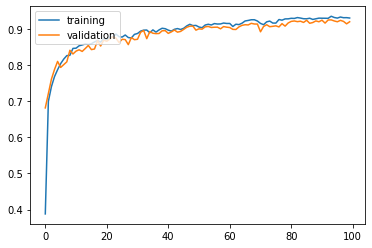

In [163]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [164]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/step


In [165]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9203000068664551


## 4. Batch Normalization

비선형 변환 전에 추가

In [166]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       # activation 전에 해야함.
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [167]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

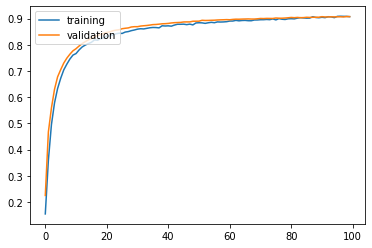

In [168]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [169]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/step


In [170]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9126999974250793


## 5. Dropout (Regularization)

- 과적합overfitting이 일어날 경우.

In [171]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                       # 0 ~ 1, x0.2개 버리겠다는 뜻.
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [172]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

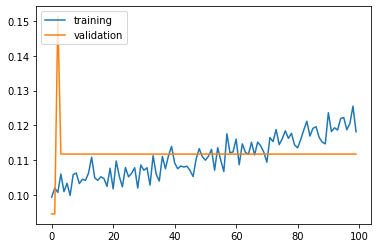

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [174]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/step


In [175]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [176]:
# one-hot encoding -> label로 다시 변환
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [177]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [181]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [182]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), 
                                              ('model2', model2), 
                                              ('model3', model3)], voting = 'soft')
# soft : 분류기마다 가중치를 다르게 설정
# hard : 분류기마다 가중치를 동일하게 설정

In [183]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 61us/step - loss: 2.3699 - accuracy: 0.1135
Epoch 2/100
19800/19800 [==============================] - 1s 50us/step - loss: 2.3212 - accuracy: 0.1135
Epoch 3/100
19800/19800 [==============================] - 1s 51us/step - loss: 2.3059 - accuracy: 0.1135
Epoch 4/100
19800/19800 [==============================] - 1s 50us/step - loss: 2.3014 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 51us/step - loss: 2.3001 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 51us/step - loss: 2.2997 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 50us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 50us/step - loss: 2.2991 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 51us/step - loss: 2.2989 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 56us/step - loss: 2.2864 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2860 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2856 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2852 - accuracy: 0.1135
Epoch 57/100
19800/19800 [==============================] - 1s 54us/step - loss: 2.2848 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2844 - accuracy: 0.1135
Epoch 59/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2840 - accuracy: 0.1135
Epoch 60/100
19800/19800 [==============================] - 1s 55us/step - loss: 2.2835 - accuracy: 0.1135
Epoch 61/100
19800/19800 [==============================] - 1s 56us/step - loss: 2.2830 - accuracy: 0.1135
Epoch 62/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026E85DE8788>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026E85DE8548>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026E85DE8B48>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [184]:
y_pred = ensemble_clf.predict(X_test)

10000/10000 [==============================] - 1s 65us/step


In [185]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.356


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [187]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [188]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [189]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [190]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [191]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.7542 - accuracy: 0.7676
Epoch 2/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.4289 - accuracy: 0.8773
Epoch 3/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.3615 - accuracy: 0.8971
Epoch 4/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.3176 - accuracy: 0.9087
Epoch 5/100
60000/60000 [==============================] - 8s 142us/step - loss: 0.2967 - accuracy: 0.9146
Epoch 6/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.2829 - accuracy: 0.9190
Epoch 7/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.2675 - accuracy: 0.9230
Epoch 8/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.2575 - accuracy: 0.9273
Epoch 9/100
60000/60000 [==============================] - 8s 141us/step - loss: 0.2458 - accuracy: 0.9299
Epoch 10/100
60000/60000 [===========

60000/60000 [==============================] - 9s 146us/step - loss: 0.1577 - accuracy: 0.9538
Epoch 53/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.1563 - accuracy: 0.9545
Epoch 54/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1604 - accuracy: 0.9531
Epoch 55/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1551 - accuracy: 0.9544
Epoch 56/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1581 - accuracy: 0.9538
Epoch 57/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.1580 - accuracy: 0.9547
Epoch 58/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.1567 - accuracy: 0.9559
Epoch 59/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.1563 - accuracy: 0.9552
Epoch 60/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.1575 - accuracy: 0.9540
Epoch 61/100
60000/60000 [===============

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026E862ACE48>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026E862ACE08>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [192]:
y_pred = ensemble_clf.predict(X_test)

In [193]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9787
